In [1]:
#pip install kmodes

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes

In [7]:
# Read in data
data = pd.read_csv('~/Downloads/LimitedData.csv')
data.head(100)

,user_id,order_id,product_id,product_name,department_id,department,aisle_id,aisle,Organic vs Non Organic,Food Group,Vegan Friendly
0,1424,1249751,48679,Organic Garnet Sweet Potato (Yam),4,produce,83,fresh vegetables,Organic,Vegitarian,Yes
1,1424,1249751,26209,Limes,4,produce,24,fresh fruits,Non-Organic,Vegitarian,Yes
2,1424,1249751,47209,Organic Hass Avocado,4,produce,24,fresh fruits,Organic,Vegitarian,Yes
3,1424,1249751,38383,Organic White Onions,4,produce,83,fresh vegetables,Organic,Vegitarian,Yes
4,1424,1249751,5876,Organic Lemon,4,produce,24,fresh fruits,Organic,Vegitarian,Yes
...,...,...,...,...,...,...,...,...,...,...,...
95,1424,2722026,21137,Organic Strawberries,4,produce,24,fresh fruits,Organic,Vegitarian,Yes
96,1424,2722026,26940,Organic Large Green Asparagus,4,produce,83,fresh vegetables,Organic,Vegitarian,Yes
97,1424,2722026,43122,Organic Bartlett Pear,4,produce,24,fresh fruits,Organic,Vegitarian,Yes
98,1424,2722026,22935,Organic Yellow Onion,4,produce,83,fresh vegetables,Organic,Vegitarian,Yes


In [4]:
# filtered_data = data[['user_id','product_id']]
# filtered_data['user_id'].value_counts()

5588     1722
59819    1395
39901    1276
1563     1252
23371    1222
52287    1213
6710     1139
55935    1112
13701    1095
26423    1084
3830     1038
23170    1027
54485     996
16274     994
23832     973
48632     969
28087     936
4625      930
31552     909
33731     906
38683     886
5360      867
25132     853
13107     851
8500      827
43758     824
37592     816
52008     794
44330     756
60694     749
49902     747
29041     743
9036      733
12416     668
23297     630
17738     621
58965     603
32099     576
4694      560
33142     538
31789     532
1424      507
2335      501
30910     496
8812      471
57546     458
36445     394
16265     393
37142     382
31355     266
Name: user_id, dtype: int64

In [8]:
# Keep a copy of data
data_copy = data.copy()

In [10]:
# Data processing
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data.head(10)

,user_id,order_id,product_id,product_name,department_id,department,aisle_id,aisle,Organic vs Non Organic,Food Group,Vegan Friendly
0,0,1414,315,145,2,11,31,20,1,1,1
1,0,1414,157,90,2,11,10,18,0,1,1
2,0,1414,307,156,2,11,10,18,1,1,1
3,0,1414,245,215,2,11,31,20,1,1,1
4,0,1414,27,165,2,11,10,18,1,1,1
5,0,1414,239,143,2,11,10,18,1,1,1
6,0,1414,150,144,2,11,31,20,1,1,1
7,0,3451,74,15,2,11,10,18,1,1,1
8,0,3451,196,133,2,11,6,19,1,1,1
9,0,3451,164,164,2,11,31,20,1,1,1


In [11]:
# Using K-Mode with "Cao" initialization
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4638, cost: 266046.0
Run 1, iteration: 2/100, moves: 3437, cost: 264501.0
Run 1, iteration: 3/100, moves: 241, cost: 264501.0


In [12]:
# Predicted Clusters
fitClusters_cao

array([0, 0, 0, ..., 1, 1, 1], dtype=uint16)

In [13]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = data.columns

# Mode of the clusters
clusterCentroidsDf

,user_id,order_id,product_id,product_name,department_id,department,aisle_id,aisle,Organic vs Non Organic,Food Group,Vegan Friendly
0,7,2370,148,16,2,11,10,18,1,1,1
1,37,2429,146,303,9,5,50,54,0,1,0


In [14]:
# Using K-Mode with "Huang" initialization
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 828, cost: 264560.0
Run 1, iteration: 2/100, moves: 0, cost: 264560.0


In [15]:
# Predicted clusters
fitClusters_huang

array([1, 1, 1, ..., 0, 0, 0], dtype=uint16)

In [16]:
# Choosing K by comparing Cost against each K
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 303590.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4638, cost: 266046.0
Run 1, iteration: 2/100, moves: 3437, cost: 264501.0
Run 1, iteration: 3/100, moves: 241, cost: 264501.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4739, cost: 247619.0
Run 1, iteration: 2/100, moves: 1478, cost: 247617.0
Run 1, iteration: 3/100, moves: 0, cost: 247617.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4611, cost: 236543.0
Run 1, iteration: 2/100, moves: 901, cost: 236541.0
Run 1, iteration: 3/100, moves: 0, cost: 236541.0


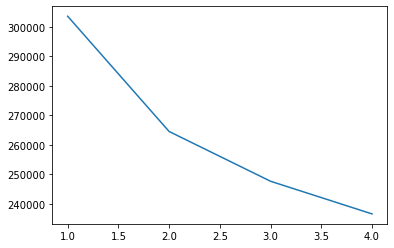

In [17]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [18]:
# Choosing K=2
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4638, cost: 266046.0
Run 1, iteration: 2/100, moves: 3437, cost: 264501.0
Run 1, iteration: 3/100, moves: 241, cost: 264501.0


In [19]:
# Combining the predicted clusters with the original DF.
data = data_copy.reset_index()

In [20]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([data, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
combinedDf.head()

,user_id,order_id,product_id,product_name,department_id,department,aisle_id,aisle,Organic vs Non Organic,Food Group,Vegan Friendly,cluster_predicted
0,1424,1249751,48679,Organic Garnet Sweet Potato (Yam),4,produce,83,fresh vegetables,Organic,Vegitarian,Yes,0
1,1424,1249751,26209,Limes,4,produce,24,fresh fruits,Non-Organic,Vegitarian,Yes,0
2,1424,1249751,47209,Organic Hass Avocado,4,produce,24,fresh fruits,Organic,Vegitarian,Yes,0
3,1424,1249751,38383,Organic White Onions,4,produce,83,fresh vegetables,Organic,Vegitarian,Yes,0
4,1424,1249751,5876,Organic Lemon,4,produce,24,fresh fruits,Organic,Vegitarian,Yes,0


In [22]:
# Cluster Identification
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29395 entries, 0 to 41226
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_id                 29395 non-null  int64 
 1   order_id                29395 non-null  int64 
 2   product_id              29395 non-null  int64 
 3   product_name            29395 non-null  object
 4   department_id           29395 non-null  int64 
 5   department              29395 non-null  object
 6   aisle_id                29395 non-null  int64 
 7   aisle                   29395 non-null  object
 8   Organic vs Non Organic  29395 non-null  object
 9   Food Group              29395 non-null  object
 10  Vegan Friendly          29395 non-null  object
 11  cluster_predicted       29395 non-null  uint16
dtypes: int64(5), object(6), uint16(1)
memory usage: 2.7+ MB


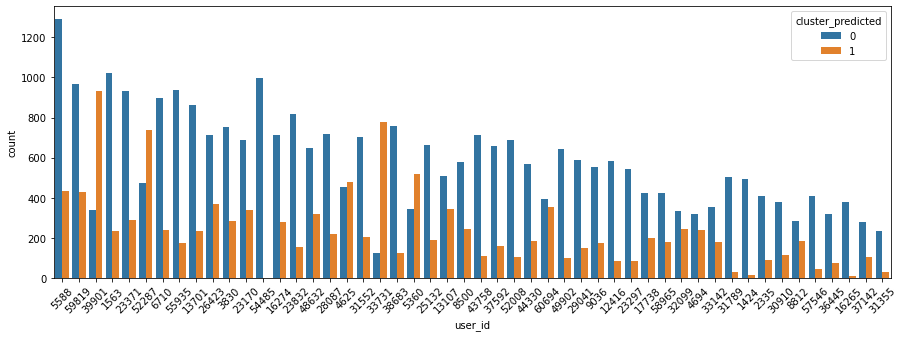

In [23]:
import seaborn as sns

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['user_id'],order=combinedDf['user_id'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.xticks(rotation = 45)
plt.show()

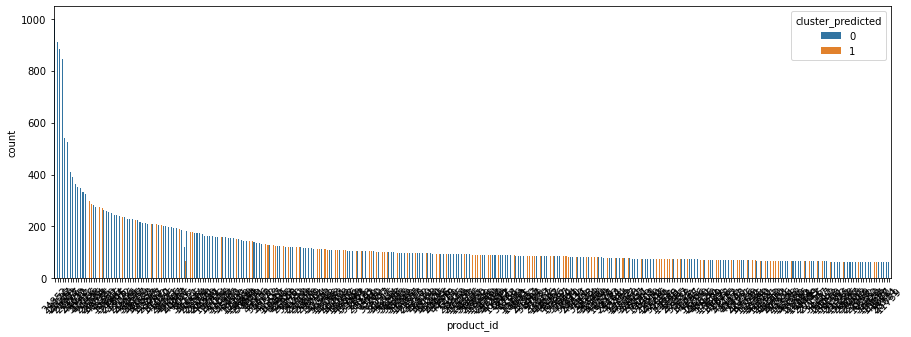

In [24]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['product_id'],order=combinedDf['product_id'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.xticks(rotation = 45)
plt.show()

In [25]:
combinedDf.to_csv('./clustered_data.csv', index=False, header=True)